In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Generate synthetic house price data
np.random.seed(42)
num_samples = 1000
sqft = np.random.randint(800, 4000, num_samples)
bedrooms = np.random.randint(1, 6, num_samples)
bathrooms = np.random.randint(1, 4, num_samples)
age = np.random.randint(0, 50, num_samples)
distance = np.random.uniform(0.5, 30, num_samples)

In [3]:
# Price formula with noise
price = (sqft * 150) + (bedrooms * 20000) + (bathrooms * 15000) - (age * 1000) - (distance * 5000) + np.random.normal(0, 50000, num_samples)


In [4]:
# Create DataFrame
df = pd.DataFrame({
    'Square Feet': sqft,
    'Bedrooms': bedrooms,
    'Bathrooms': bathrooms,
    'Age': age,
    'Distance from City Center': distance,
    'Price': price
})

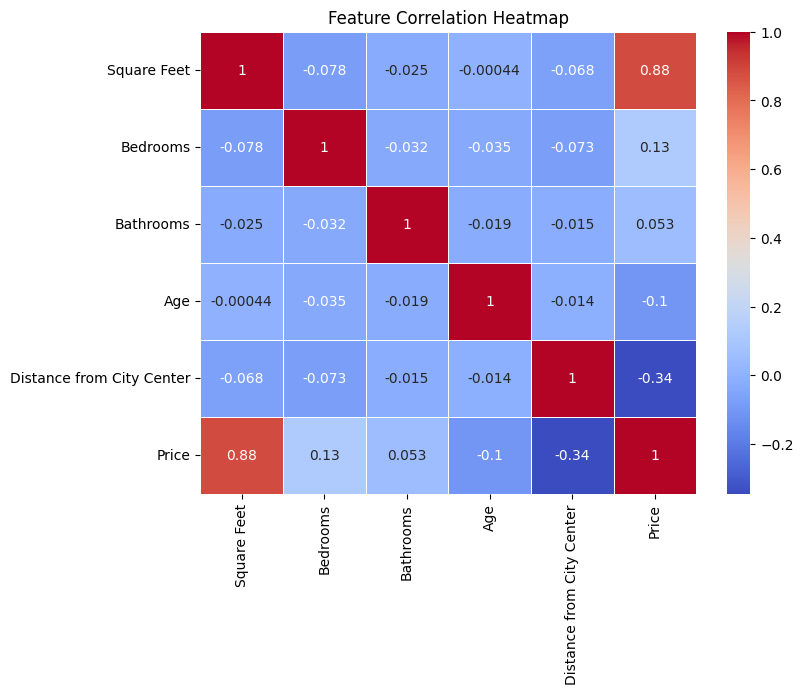

In [5]:
# Feature Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [6]:
# Split data
X = df.drop(columns=['Price'])
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}


In [9]:
results = []

In [10]:
predictions = {}

In [11]:
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    predictions[model_name] = y_pred
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": model_name, "MSE": mse, "R2 Score": r2})

In [12]:
# Convert results to DataFrame and save to CSV
results_df = pd.DataFrame(results)
results_df.to_csv("model_performance.csv", index=False)
print(results_df)

               Model           MSE  R2 Score
0  Linear Regression  2.334071e+09  0.895177
1      Random Forest  3.035537e+09  0.863675
2            XGBoost  3.468043e+09  0.844251
3  Gradient Boosting  2.895967e+09  0.869943
4                SVR  2.266204e+10 -0.017748
5                KNN  4.456188e+09  0.799873


In [17]:
if hasattr(model, "feature_importances_"):
    importances = model.feature_importances_
    sns.barplot(x=X.columns, y=importances, ax=axes[i*4+2])
    axes[i*4+2].set_title(f"{model_name}: Feature Importance")
    axes[i*4+2].tick_params(axis='x', rotation=90)


AttributeError: 'KNeighborsRegressor' object has no attribute 'feature_importances_'

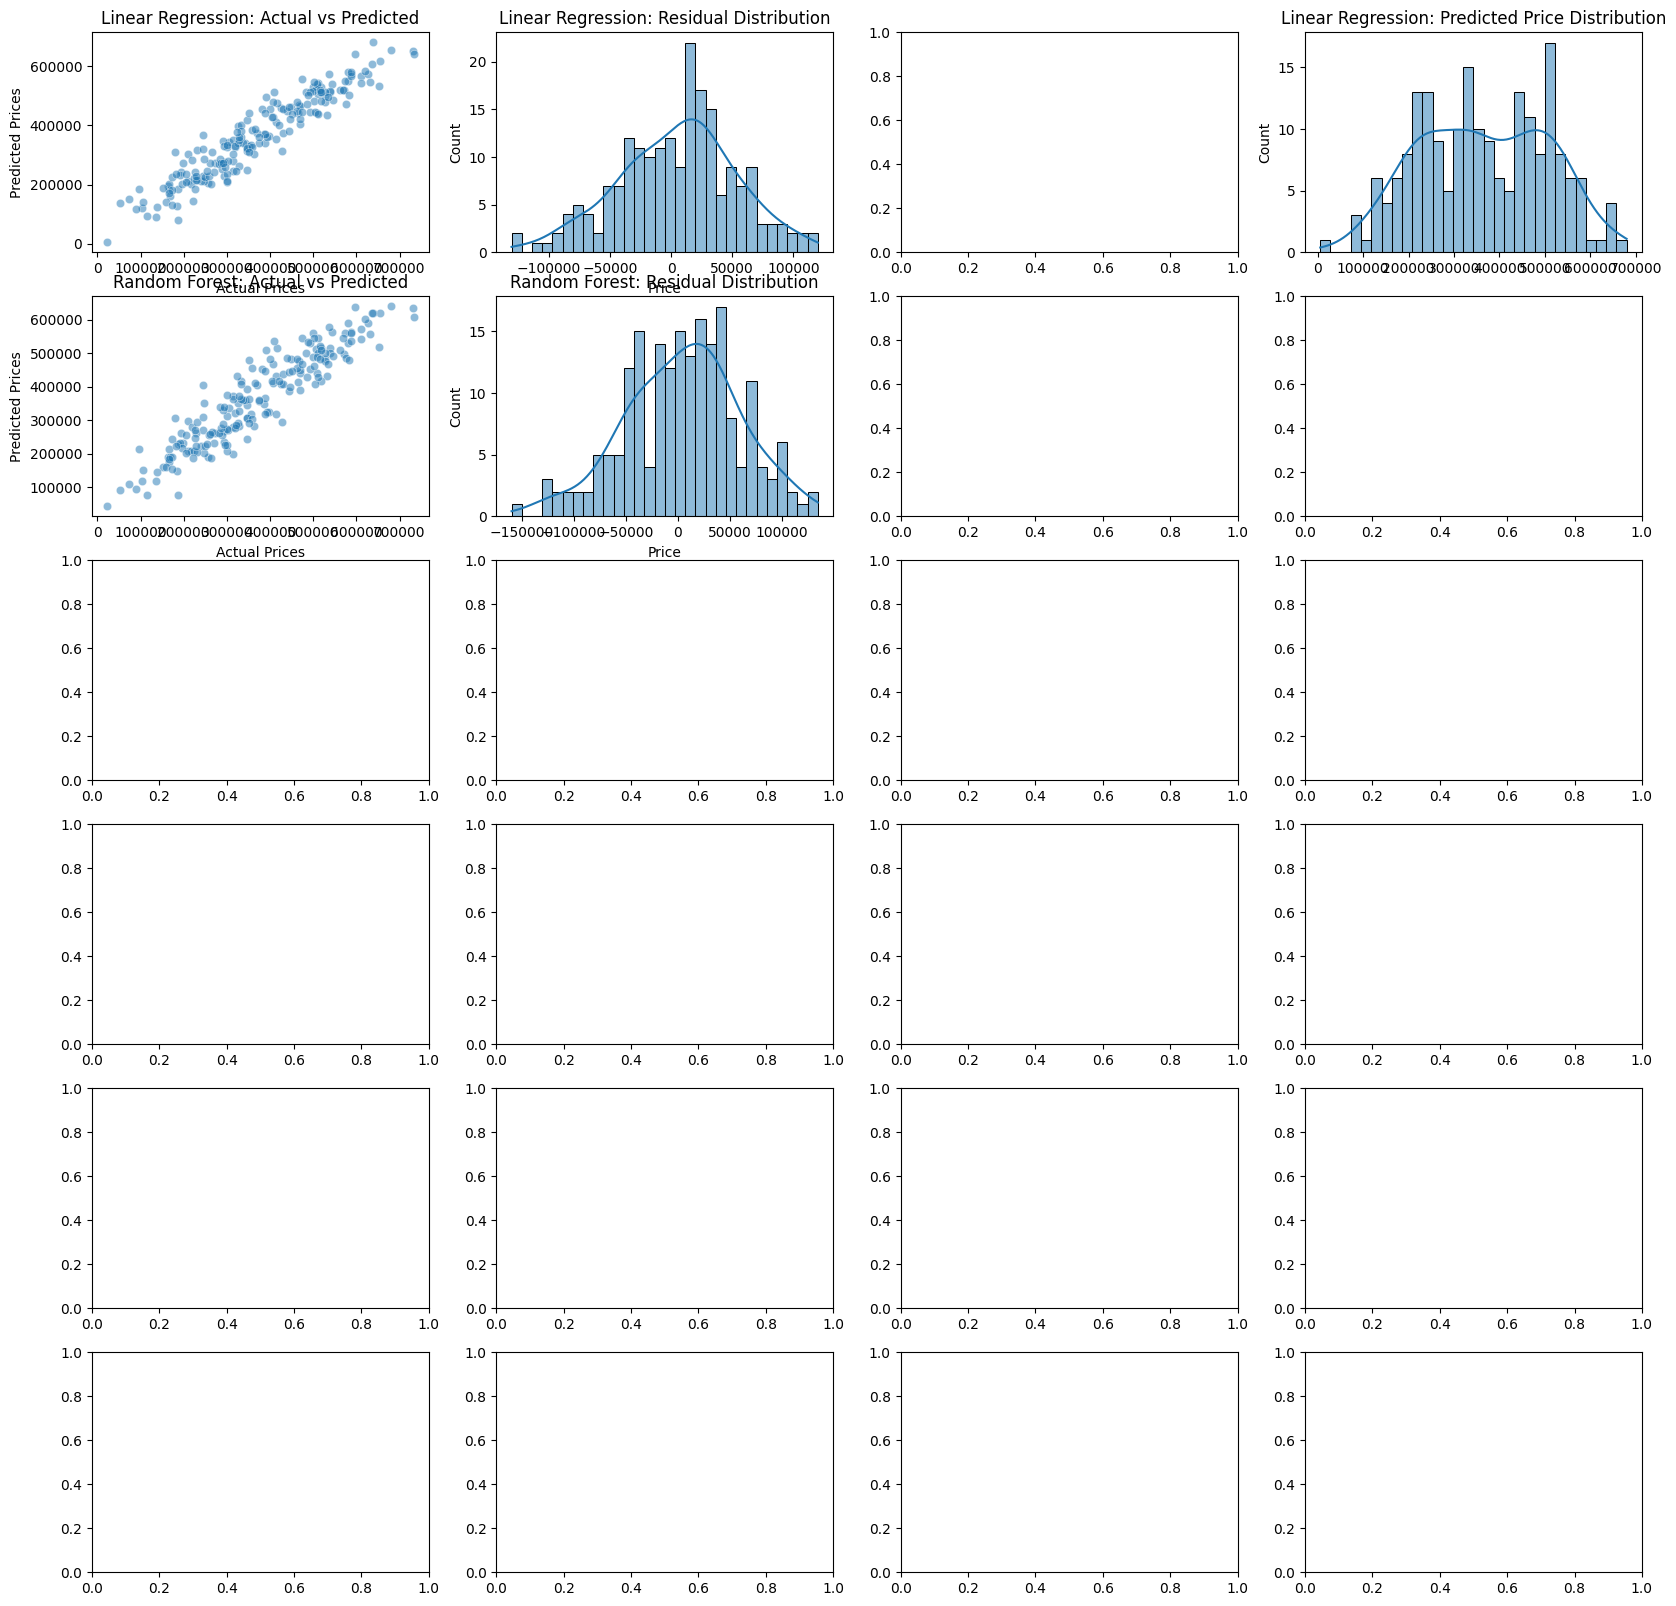

In [18]:
# Visualizations
fig, axes = plt.subplots(6, 4, figsize=(20, 20))
axes = axes.ravel()


for i, (model_name, y_pred) in enumerate(predictions.items()):
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, ax=axes[i*4])
    axes[i*4].set_title(f"{model_name}: Actual vs Predicted")
    axes[i*4].set_xlabel("Actual Prices")
    axes[i*4].set_ylabel("Predicted Prices")
    
    sns.histplot(y_test - y_pred, bins=30, kde=True, ax=axes[i*4+1])
    axes[i*4+1].set_title(f"{model_name}: Residual Distribution")
    
    if model_name in ["Random Forest", "XGBoost", "Gradient Boosting"]:
        importances = model.feature_importances_
        sns.barplot(x=X.columns, y=importances, ax=axes[i*4+2])
        axes[i*4+2].set_title(f"{model_name}: Feature Importance")
        axes[i*4+2].tick_params(axis='x', rotation=90)
    
    sns.histplot(y_pred, bins=30, kde=True, ax=axes[i*4+3])
    axes[i*4+3].set_title(f"{model_name}: Predicted Price Distribution")

plt.tight_layout()
plt.show()

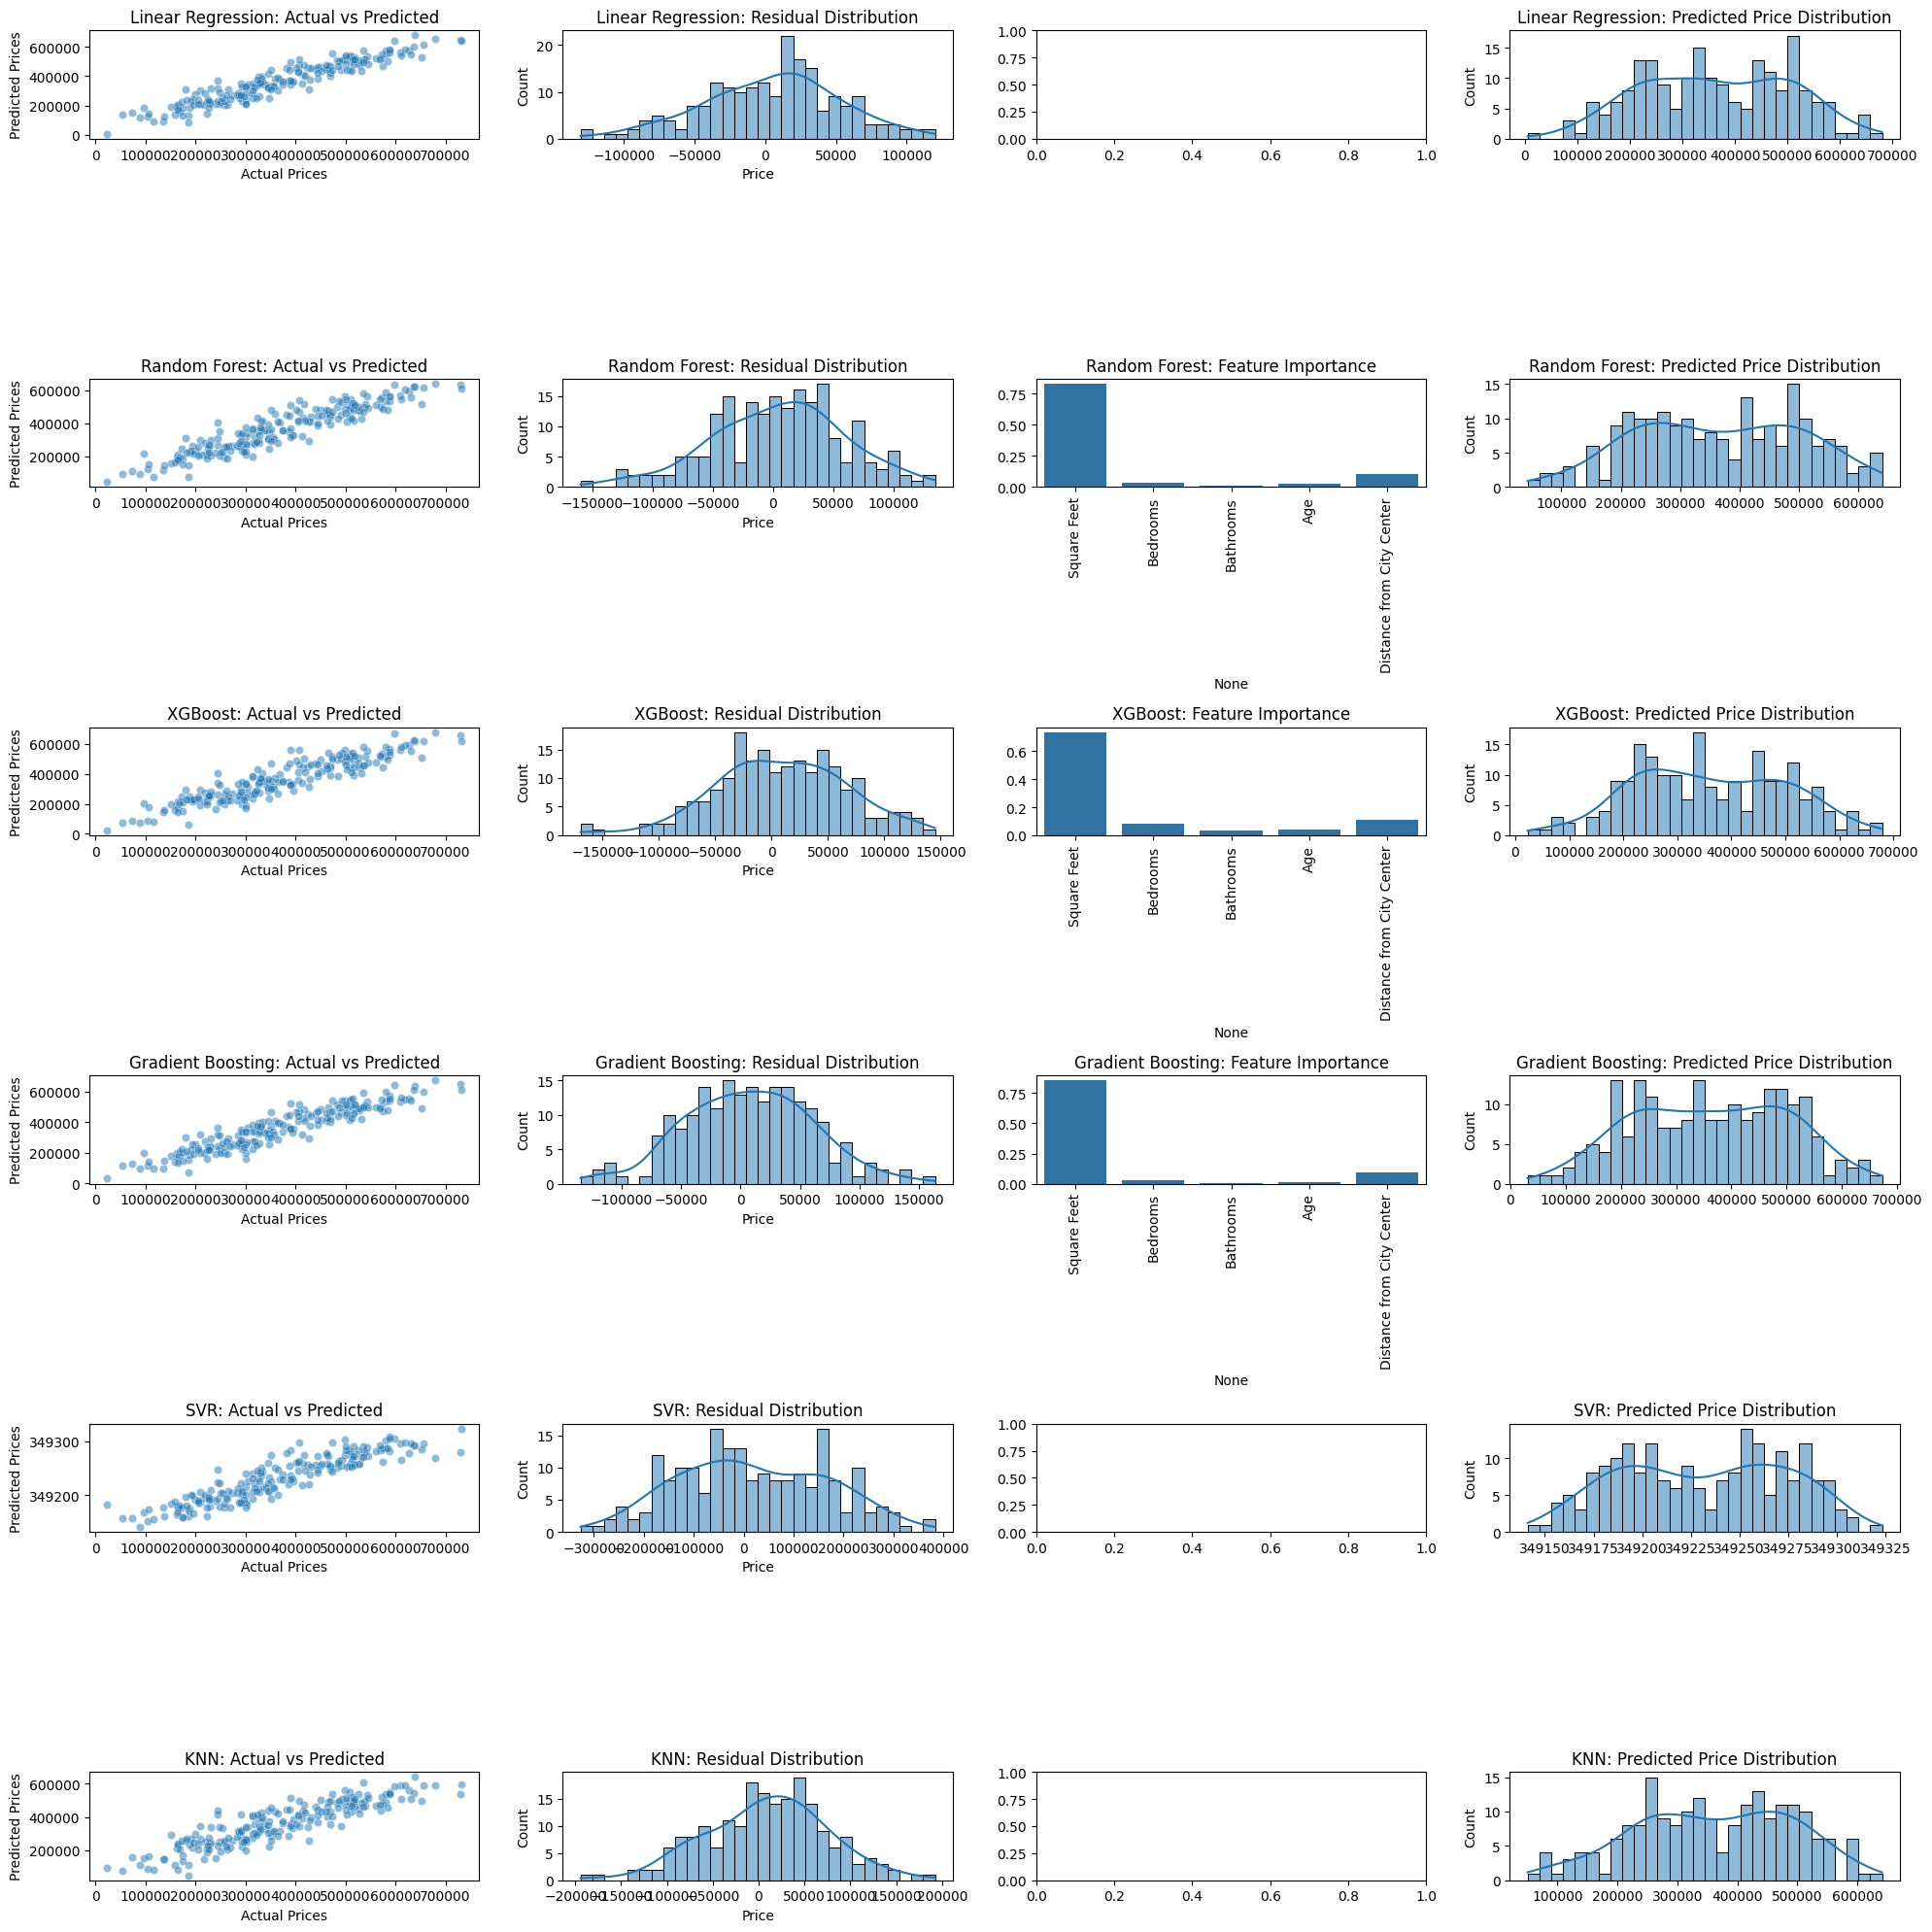

In [19]:
# Visualizations
fig, axes = plt.subplots(6, 4, figsize=(20, 20))
axes = axes.ravel()

for i, (model_name, y_pred) in enumerate(predictions.items()):
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, ax=axes[i*4])
    axes[i*4].set_title(f"{model_name}: Actual vs Predicted")
    axes[i*4].set_xlabel("Actual Prices")
    axes[i*4].set_ylabel("Predicted Prices")
    
    sns.histplot(y_test - y_pred, bins=30, kde=True, ax=axes[i*4+1])
    axes[i*4+1].set_title(f"{model_name}: Residual Distribution")
    
    if hasattr(models[model_name], "feature_importances_"):
        importances = models[model_name].feature_importances_
        sns.barplot(x=X.columns, y=importances, ax=axes[i*4+2])
        axes[i*4+2].set_title(f"{model_name}: Feature Importance")
        axes[i*4+2].tick_params(axis='x', rotation=90)
    
    sns.histplot(y_pred, bins=30, kde=True, ax=axes[i*4+3])
    axes[i*4+3].set_title(f"{model_name}: Predicted Price Distribution")

plt.tight_layout()
plt.show()